In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats


In [51]:
df = pd.read_csv('generated_data_normal.csv')
df

,Product_ID,Product_Name,Calories,Carbs,Sugars,Fat,Protein,Sodium,Serving_Size,Health_Condition,Height,Weight,Age,BMI,Activity_Level,Blood_Sugar_Level,Blood_Pressure,Health_Compatibility_Score,Health_Risk
0,P16601,bring Product,289.56,49.71,22.12,19.29,18.38,1460.70,214.09,Diabetic,170.63,57.14,50,19.625894,High,174.127264,104.386695,41.185211,High
1,P27319,reason Product,247.07,49.49,19.57,35.00,8.48,195.36,178.19,Obese,166.86,94.59,74,33.973536,Medium,119.959580,150.729833,49.392329,High
2,P20205,wall Product,209.52,68.09,15.72,27.70,15.92,1043.50,128.07,Heart Disease,164.64,47.37,71,17.475623,High,96.220791,137.230824,77.661754,Low
3,P78943,general Product,217.64,46.73,17.72,9.15,19.40,931.10,160.60,Diabetic,178.02,55.07,40,17.377107,Medium,203.874283,101.538758,58.170785,Medium
4,P68974,skill Product,249.84,60.22,20.80,9.26,16.20,1562.99,157.93,Hypertension,169.28,44.53,23,15.539656,High,89.485015,115.987867,62.306788,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,P61848,ready Product,282.19,31.10,10.69,22.07,14.93,1114.50,155.99,Hypertension,184.11,68.09,22,20.087624,Low,113.037488,131.805552,49.460751,High
49996,P54125,go Product,234.39,61.44,13.47,1.03,23.07,333.73,52.93,Diabetic,178.19,100.54,64,31.664470,Low,280.196919,129.096066,28.894760,High
49997,P55968,participant Product,235.95,26.07,14.79,17.87,13.53,223.80,134.69,Heart Disease,156.96,83.10,75,33.730521,Low,98.261046,140.428276,45.705959,High
49998,P54426,condition Product,235.84,46.38,12.82,12.63,9.20,93.73,186.34,Diabetic,154.05,96.10,36,40.494868,Low,223.109321,142.836419,13.488965,High


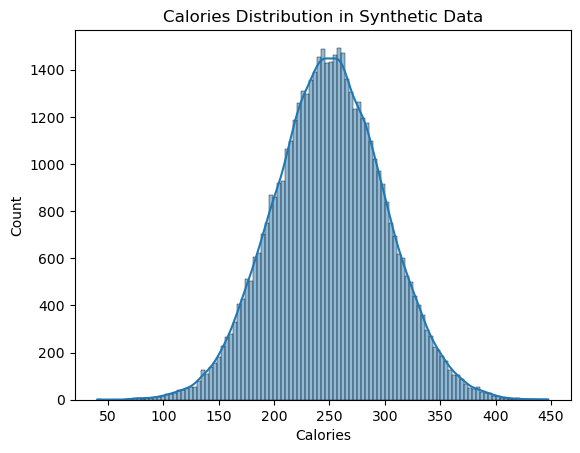

count    50000.000000
mean       250.055241
std         49.853307
min         40.320000
25%        216.720000
50%        249.940000
75%        283.420000
max        447.600000
Name: Calories, dtype: float64

Shapiro-Wilk Test p-value for Calories: 0.6611891815260876


c:\Users\nabil\miniconda3\envs\coal-forecast\lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 50000.
  res = hypotest_fun_out(*samples, **kwds)


In [52]:
# Plot histogram of Calories
sns.histplot(df['Calories'], kde=True)
plt.title("Calories Distribution in Synthetic Data")
plt.show()

# Check summary statistics
print(df['Calories'].describe())

# Check for normality using the Shapiro-Wilk test (normality test)
stat, p_value = stats.shapiro(df['Calories'])
print(f"\nShapiro-Wilk Test p-value for Calories: {p_value}")


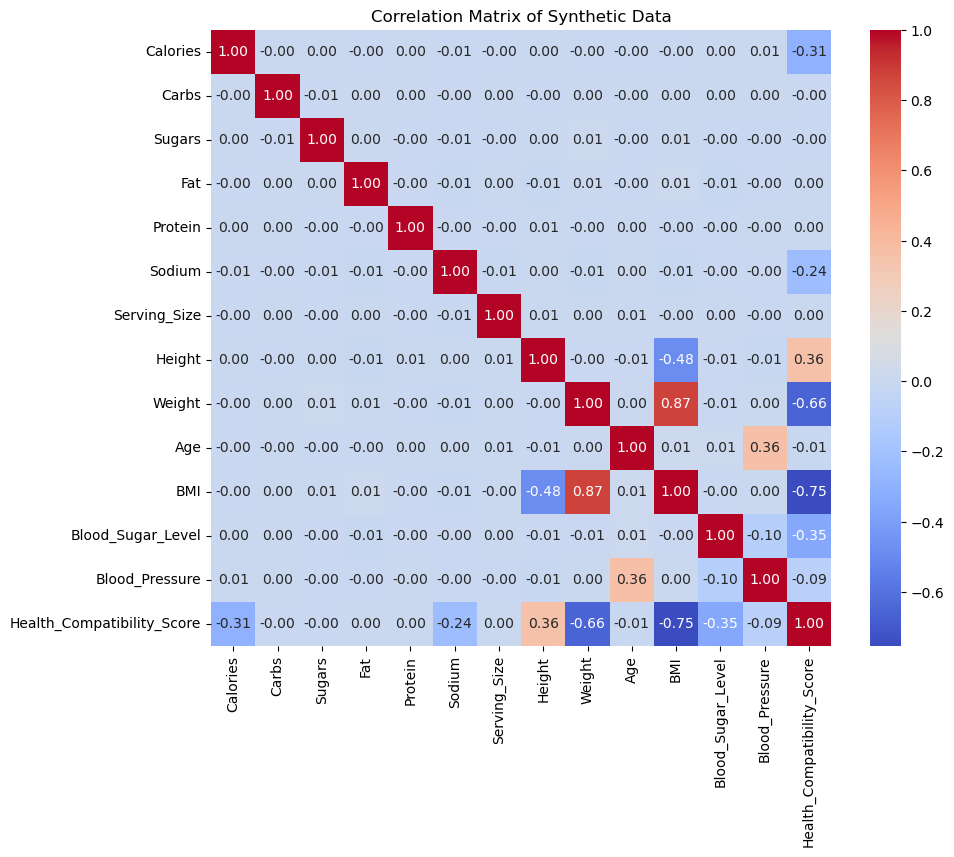

In [53]:
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Synthetic Data")
plt.show()

In [54]:
df.shape

(50000, 19)

c:\Users\nabil\miniconda3\envs\coal-forecast\lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 44440.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro-Wilk Test p-value for BMI: 2.1665135677719597e-62
The BMI column does not follow a normal distribution.
Shapiro-Wilk Test p-value for Blood_Pressure: 7.231782113485586e-63
The Blood_Pressure column does not follow a normal distribution.
Shapiro-Wilk Test p-value for Calories: 0.5561894653491772
           Calories         Carbs        Sugars           Fat       Protein  \
count  44440.000000  44440.000000  44440.000000  44440.000000  44440.000000   
mean     250.046909     40.000604     14.976319     19.995674     15.043590   
std       49.833398     15.055520      4.987575      8.015625      6.010453   
min       40.320000    -22.900000     -6.380000    -10.950000    -10.140000   
25%      216.817500     29.810000     11.600000     14.580000     11.010000   
50%      249.860000     40.030000     14.980000     20.050000     15.045000   
75%      283.390000     50.230000     18.370000     25.400000     19.090000   
max      447.600000    101.910000     37.110000     54.130000   

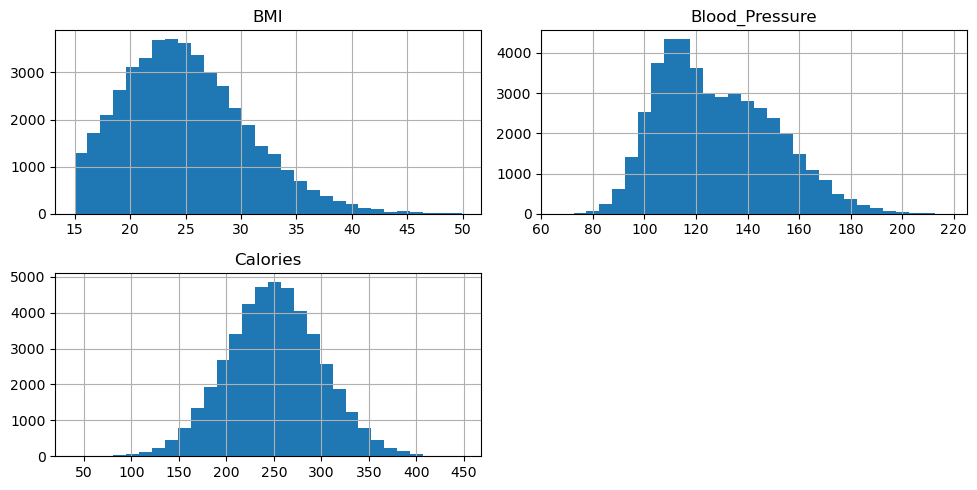

In [55]:
# Function to validate BMI calculation
def validate_bmi(df):
    df['Calculated_BMI'] = df['Weight'] / (df['Height'] / 100) ** 2
    # Drop rows where the BMI calculation seems unrealistic (e.g., too high or low)
    df = df[(df['Calculated_BMI'] >= 15) & (df['Calculated_BMI'] <= 50)]  # Logical BMI range
    return df

# Check for height and weight outliers (e.g., height < 130 cm or weight > 200 kg)
def validate_height_weight(df):
    df = df[(df['Height'] >= 130) & (df['Height'] <= 200)]
    df = df[(df['Weight'] >= 30) & (df['Weight'] <= 200)]  # Realistic weight range
    return df

# Check if blood pressure and blood sugar are consistent with health condition
def validate_health_parameters(df):
    df = df[(df['Health_Condition'] != 'Diabetic') | (df['Blood_Sugar_Level'] >= 150)]  # Diabetic should have higher blood sugar
    df = df[(df['Health_Condition'] != 'Hypertension') | (df['Blood_Pressure'] >= 130)]  # Hypertension should have higher BP
    return df

# Run normality tests (Shapiro-Wilk) on key variables to check distributions
def run_shapiro_wilk_test(df, column):
    stat, p_value = stats.shapiro(df[column])
    print(f"Shapiro-Wilk Test p-value for {column}: {p_value}")
    return p_value

# Perform the validations
def validate_data(df):
    df = validate_bmi(df)
    df = validate_height_weight(df)
    df = validate_health_parameters(df)
    
    # Run normality tests for certain columns (BMI, Blood Pressure, Calories)
    columns_to_test = ['BMI', 'Blood_Pressure', 'Calories']
    for column in columns_to_test:
        p_value = run_shapiro_wilk_test(df, column)
        if p_value < 0.05:
            print(f"The {column} column does not follow a normal distribution.")
    
    return df

# Validate the data
validated_data = validate_data(df)

# Show summary of the validated data
print(validated_data.describe())

# Plot histograms of key variables after validation
validated_data[['BMI', 'Blood_Pressure', 'Calories']].hist(bins=30, figsize=(10, 5))
plt.tight_layout()
plt.show()


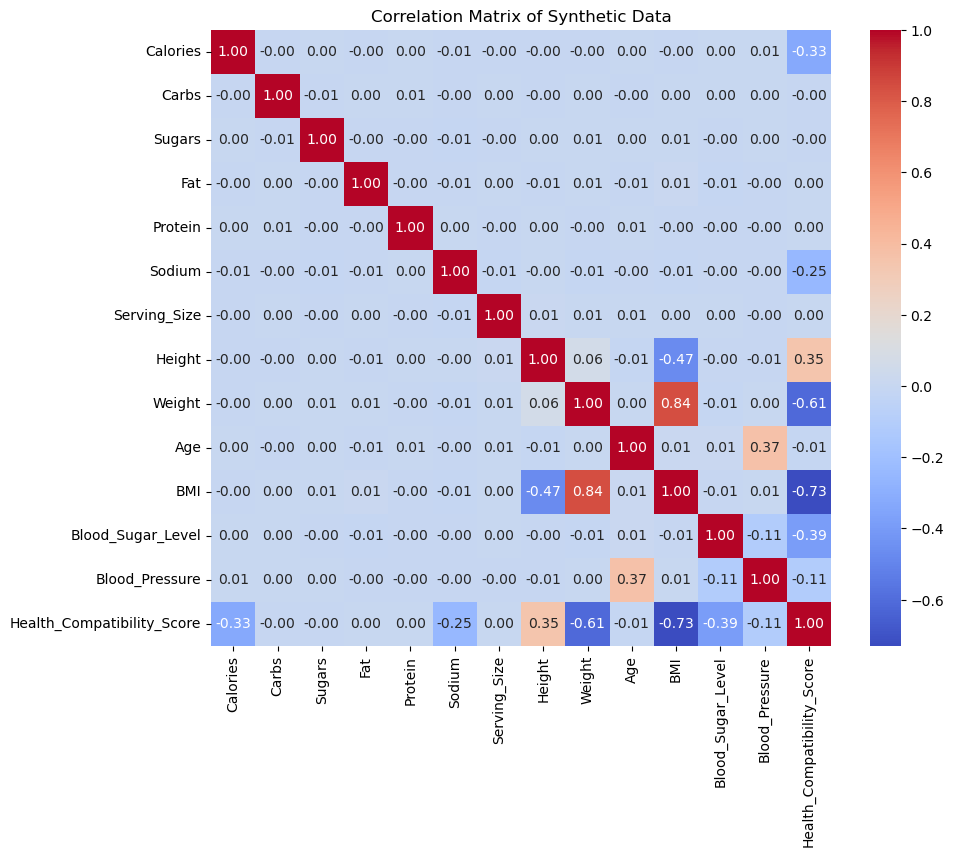

In [60]:
validated_data = validated_data.drop(columns=['Calculated_BMI'], axis=1)
correlation_matrix = validated_data.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Synthetic Data")
plt.show()

In [61]:
validated_data.to_csv('validated_data.csv', index=False)